# First effort: transferring the time series operation included in the challenge ML07/

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from os import path

# Loading data

In [2]:
### For now, let's just work with the main table FactSales
data = pd.read_csv("../raw_data/FactSales.csv")

data.set_index(['SalesKey'], inplace=True)

data.head()

,DateKey,channelKey,StoreKey,ProductKey,PromotionKey,CurrencyKey,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount
SalesKey,,,,,,,,,,,,,,,
1,2007-01-02,1,209,956,10,1,91.05,198.0,8,0,0.0,1,39.600,728.40,1544.400
2,2007-02-12,4,308,766,2,1,10.15,19.9,4,0,0.0,1,0.995,40.60,78.605
3,2008-01-24,1,156,1175,11,1,209.03,410.0,9,0,0.0,3,61.500,1881.27,3628.500
4,2008-01-13,2,306,1429,10,1,132.90,289.0,8,0,0.0,1,57.800,1063.20,2254.200
5,2008-01-22,2,306,1133,10,1,144.52,436.2,24,0,0.0,3,261.720,3468.48,10207.080


In [3]:
data.describe()

,channelKey,StoreKey,ProductKey,PromotionKey,CurrencyKey,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount
count,3.406089e+06,3.406089e+06,3.406089e+06,3.406089e+06,3406089.0,3.406089e+06,3.406089e+06,3.406089e+06,3.406089e+06,3.406089e+06,3.406089e+06,3.406089e+06,3.406089e+06,3.406089e+06
mean,1.658594e+00,1.988587e+02,1.275001e+03,8.465855e+00,1.0,1.370120e+02,3.204862e+02,1.565445e+01,1.449131e-01,4.604676e+01,1.494046e+00,5.993886e+01,1.575090e+03,3.644549e+03
std,1.028630e+00,9.489878e+01,7.117874e+02,8.220495e+00,0.0,1.675636e+02,4.285798e+02,3.361445e+01,3.627755e-01,2.025121e+02,1.825627e+00,1.645126e+02,2.110969e+03,5.312442e+03
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,4.800000e-01,9.500000e-01,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.920000e+00,3.040000e+00
25%,1.000000e+00,1.260000e+02,6.630000e+02,1.000000e+00,1.0,3.219000e+01,6.800000e+01,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.058500e+02,6.119400e+02
50%,1.000000e+00,2.000000e+02,1.267000e+03,4.000000e+00,1.0,8.412000e+01,1.900000e+02,1.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,2.532000e+00,9.432800e+02,2.105883e+03
75%,2.000000e+00,3.000000e+02,1.904000e+03,1.400000e+01,1.0,1.662000e+02,3.690000e+02,1.300000e+01,0.000000e+00,0.000000e+00,3.000000e+00,5.160000e+01,2.024730e+03,4.557105e+03
max,4.000000e+00,3.100000e+02,2.517000e+03,2.800000e+01,1.0,1.060220e+03,3.199990e+03,2.880000e+03,5.000000e+00,9.996000e+03,2.400000e+01,7.958700e+03,1.371178e+05,4.080160e+05


In [4]:
data.shape

(3406089, 15)

In [5]:
data.isna().sum()

DateKey             0
channelKey          0
StoreKey            0
ProductKey          0
PromotionKey        0
CurrencyKey         0
UnitCost            0
UnitPrice           0
SalesQuantity       0
ReturnQuantity      0
ReturnAmount        0
DiscountQuantity    0
DiscountAmount      0
TotalCost           0
SalesAmount         0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3406089 entries, 1 to 3406089
Data columns (total 15 columns):
 #   Column            Dtype  
---  ------            -----  
 0   DateKey           object 
 1   channelKey        int64  
 2   StoreKey          int64  
 3   ProductKey        int64  
 4   PromotionKey      int64  
 5   CurrencyKey       int64  
 6   UnitCost          float64
 7   UnitPrice         float64
 8   SalesQuantity     int64  
 9   ReturnQuantity    int64  
 10  ReturnAmount      float64
 11  DiscountQuantity  int64  
 12  DiscountAmount    float64
 13  TotalCost         float64
 14  SalesAmount       float64
dtypes: float64(6), int64(8), object(1)
memory usage: 415.8+ MB


In [7]:
data.isnull().sum()

DateKey             0
channelKey          0
StoreKey            0
ProductKey          0
PromotionKey        0
CurrencyKey         0
UnitCost            0
UnitPrice           0
SalesQuantity       0
ReturnQuantity      0
ReturnAmount        0
DiscountQuantity    0
DiscountAmount      0
TotalCost           0
SalesAmount         0
dtype: int64

In [8]:
data.dtypes

DateKey              object
channelKey            int64
StoreKey              int64
ProductKey            int64
PromotionKey          int64
CurrencyKey           int64
UnitCost            float64
UnitPrice           float64
SalesQuantity         int64
ReturnQuantity        int64
ReturnAmount        float64
DiscountQuantity      int64
DiscountAmount      float64
TotalCost           float64
SalesAmount         float64
dtype: object

In [9]:
data['DateKey'] = pd.to_datetime(data['DateKey'], infer_datetime_format=True)

# Data exploration

In [10]:
y_pred = data["SalesAmount"].shift(1).dropna()
y_pred

SalesKey
2           1544.400
3             78.605
4           3628.500
5           2254.200
6          10207.080
             ...    
3406085     2879.928
3406086        4.750
3406087    11976.000
3406088      849.830
3406089    20310.750
Name: SalesAmount, Length: 3406088, dtype: float64

### Baseline: predicting the next from previous value

In [11]:
from sklearn.metrics import r2_score

y_true = data["SalesAmount"][1:]

print(f"R2: {r2_score(y_true, y_pred)}")

R2: -0.9939634282992094


## Seasonal time series analysis

#### **Note: If we are interested in additional variables, we should include them in our dataset beforehand**

#### **Also note: this step should be user-controllable in the dashboard, e.g. choosing aggregation by week, month, year, ...**

In [12]:
data_seasonal = data.groupby("DateKey").sum()
data_seasonal = data.groupby("DateKey").agg(
    {"UnitCost": "sum", "UnitPrice": "sum", "ReturnQuantity": "sum", "ReturnAmount": "sum", "DiscountQuantity": "sum", "DiscountAmount": "sum", "TotalCost": "sum", "SalesQuantity": "sum", "SalesAmount": "sum"})

print(data_seasonal.shape)
data_seasonal.head(20)

(1096, 9)


,UnitCost,UnitPrice,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesQuantity,SalesAmount
DateKey,,,,,,,,,
2007-01-01,366532.85,836949.226,533,115502.510,8402,196886.0684,3667018.43,37237,8.310498e+06
2007-01-02,377069.54,853070.198,510,124318.940,8231,204971.8391,3697809.22,38193,8.326143e+06
2007-01-03,371929.21,843061.284,594,124771.940,8386,198631.5069,3695293.94,38671,8.409919e+06
2007-01-04,368132.73,842069.948,509,126866.100,8286,193369.2363,3591397.68,36968,8.231880e+06
2007-01-05,369473.78,840852.896,561,141977.748,8228,199059.7830,3552350.93,36237,8.089676e+06
2007-01-06,388867.11,889892.368,429,94856.080,8413,202307.0032,3788017.67,37536,8.656980e+06
2007-01-07,394988.56,910432.248,535,119321.290,8504,207380.5065,3863855.24,38970,8.964768e+06
2007-01-08,370699.10,850484.614,488,103555.678,7927,200702.7001,3622237.80,35463,8.277675e+06
2007-01-09,371482.43,850887.832,479,107286.100,8489,207990.1317,3697416.74,36699,8.400907e+06


####

In [13]:
print(data_seasonal.index.nunique())

1096


In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL

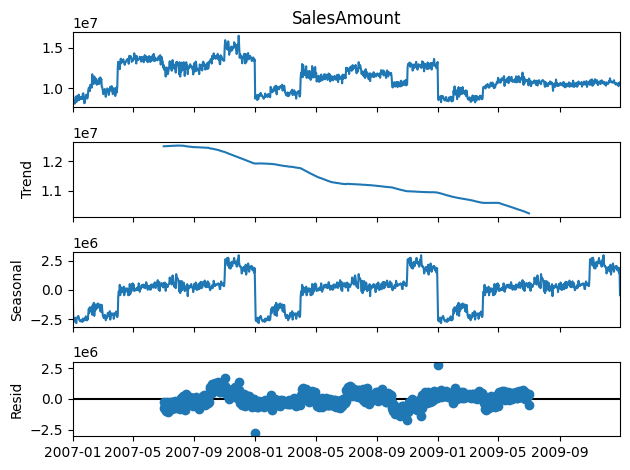

In [15]:
# Additive Decomposition (y = Trend + Seasonal + Residuals)
result_add = seasonal_decompose(data_seasonal['SalesAmount'], period = 365, model='additive')
result_add.plot();

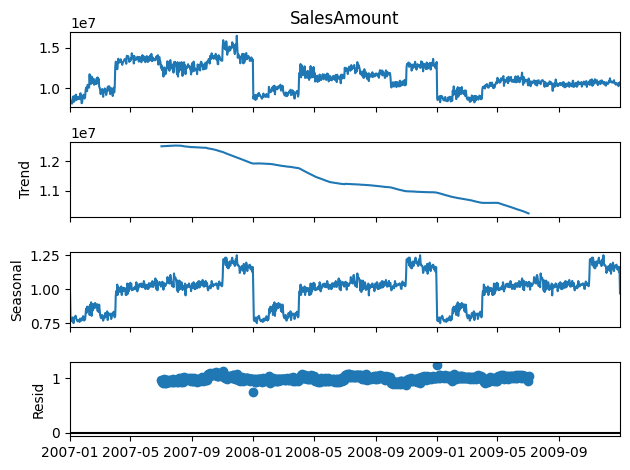

In [16]:
# Multiplicative Decomposition (y = Trend * Seasonal * Residuals)
result_mul = seasonal_decompose(data_seasonal['SalesAmount'], period = 365, model='multiplicative')
result_mul.plot();

<Axes: xlabel='DateKey'>

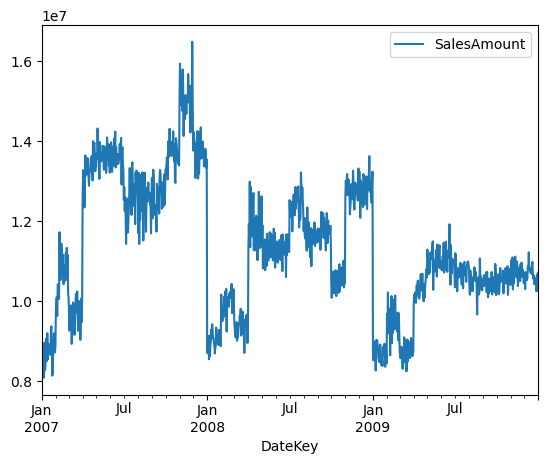

In [17]:
data_seasonal.plot(y = "SalesAmount")

<Axes: xlabel='DateKey'>

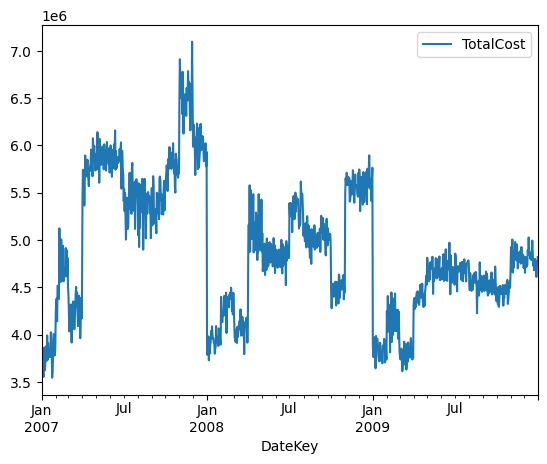

In [18]:
data_seasonal.plot(y = "TotalCost")

## Test stationarity

### By decomposition

In [19]:
from statsmodels.tsa.stattools import adfuller

<Axes: xlabel='DateKey'>

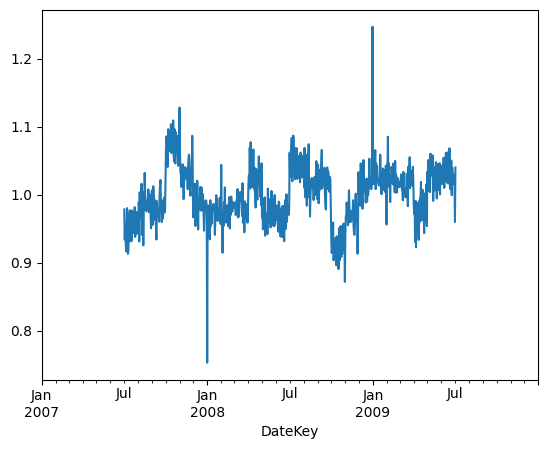

In [20]:
result_mul.resid.plot()

In [21]:
print('multiplicative resid: ', adfuller(result_mul.resid.dropna())[1])

multiplicative resid:  0.0017583112007925367


<Axes: xlabel='DateKey'>

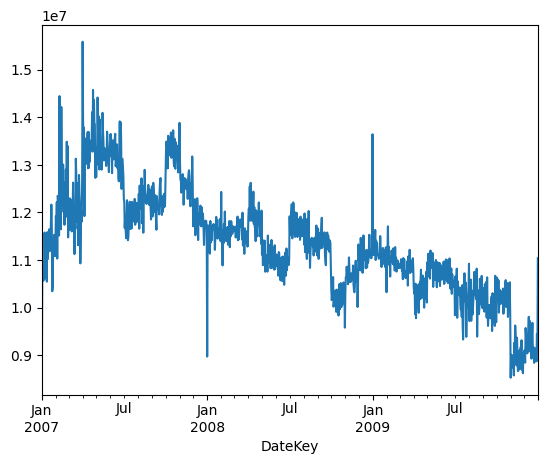

In [22]:
## Trend + residuals
(data_seasonal["SalesAmount"].values/result_mul.seasonal).plot()

### By differencing

#### (very promising!)

<Axes: xlabel='DateKey'>

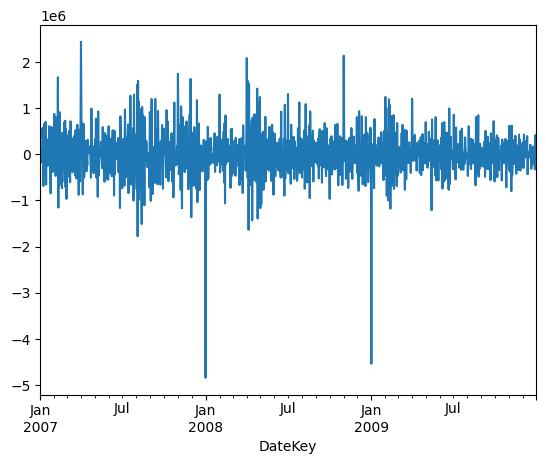

In [23]:
data_seasonal["SalesAmount"].diff().plot()

In [24]:
print('differenced SalesAmount: ', adfuller(data_seasonal["SalesAmount"].diff().dropna())[1])

differenced SalesAmount:  1.361675225765104e-27


## Test autocorrelation

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

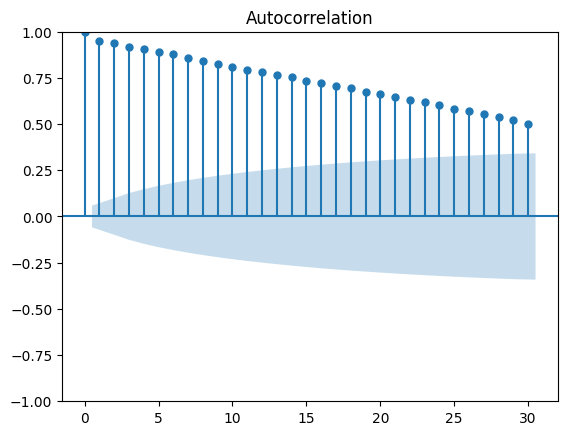

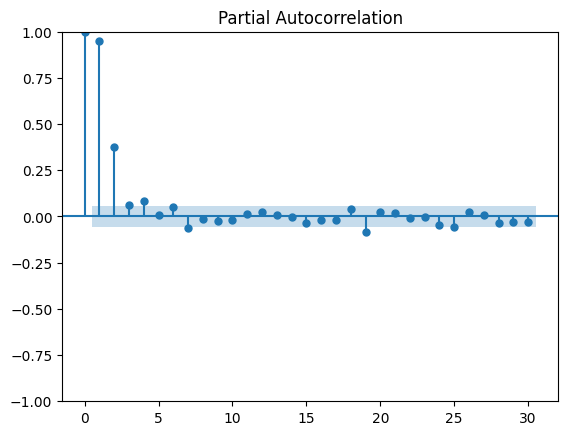

In [26]:
plot_acf(data_seasonal["SalesAmount"], lags = 30)
plot_pacf(data_seasonal["SalesAmount"], lags = 30);

# Predicting future values

## ARIMA (diff)

In [27]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_predict

In [28]:
data_seasonal["SalesAmount_diff"] = data_seasonal["SalesAmount"].diff()
data_seasonal["SalesAmount_diff"].iloc[0] = data_seasonal["SalesAmount_diff"].iloc[1] # remove NaN in first row

/tmp/ipykernel_1335/1399848615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_seasonal["SalesAmount_diff"].iloc[0] = data_seasonal["SalesAmount_diff"].iloc[1] # remove NaN in first row


In [29]:
auto_arima = pm.auto_arima(data_seasonal["SalesAmount_diff"],
                       start_p=1, max_p=3,
                       start_q=1, max_q=5,
                       trend='t',
                       seasonal=False,
                       trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=31780.648, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=31986.081, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=31790.952, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=31781.685, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=31778.689, Time=0.25 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=31786.180, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=31777.322, Time=0.29 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=31776.626, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=31776.626, Time=0.09 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 1.128 seconds


In [30]:
model_arima = ARIMA(data_seasonal["SalesAmount_diff"], order=(3, 0, 0), trend='t')
model_arima = model_arima.fit()
model_arima.summary()

/home/kai/.pyenv/versions/3.10.6/envs/sales-ninja/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/kai/.pyenv/versions/3.10.6/envs/sales-ninja/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/kai/.pyenv/versions/3.10.6/envs/sales-ninja/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       SalesAmount_diff   No. Observations:                 1096
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -15883.313
Date:                Tue, 03 Jun 2025   AIC                          31776.627
Time:                        12:34:23   BIC                          31801.624
Sample:                    01-01-2007   HQIC                         31786.085
                         - 12-31-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.5181     16.488     -0.092      0.927     -33.834      30.798
ar.L1         -0.4455      0.014    -31.532      0.000      -0.473      -0.418
ar.L2         -0.1232      0.028     -4.341      0.000      -0.179      -0.068
ar.L3         -0.1023      0.030     -3.373      0.001      -0.162      -0.043
sigma2      2.271e+11    2.7e-08    8.4e+18      0.000    2.27e+11    2.27e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             15195.55
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                            -1.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.53e+33. Standard errors may be unstable.
"""

/home/kai/.pyenv/versions/3.10.6/envs/sales-ninja/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:887: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


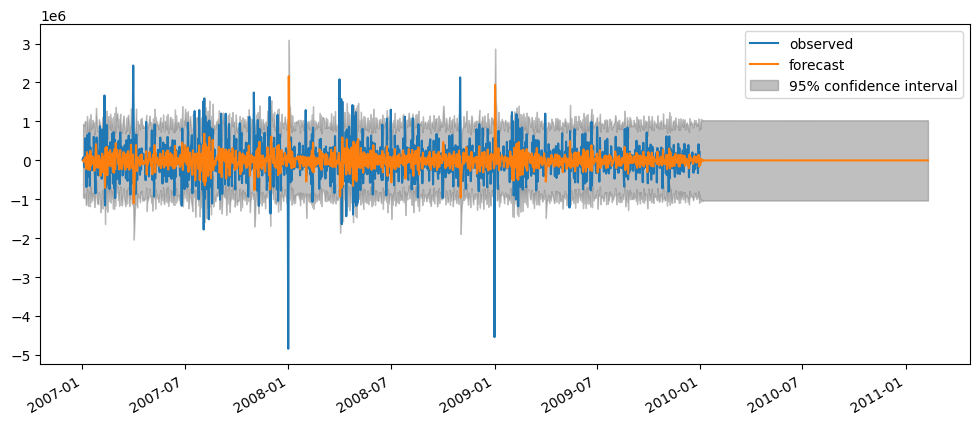

In [31]:
fig, axs = plt.subplots(1, 1, figsize=(12, 5))
axs.plot(data_seasonal["SalesAmount_diff"], label='observed')
plot_predict(model_arima, start=1, end=1500, ax=axs);

In [32]:
# Let's keep 30% of the values out for testing purposes
train_size = 0.7
split_index = round(train_size*data_seasonal.shape[0])

X_train = data_seasonal.iloc[:split_index]
X_test = data_seasonal.iloc[split_index:]

In [33]:
model_arima = ARIMA(X_train["SalesAmount_diff"], order=(3, 0, 0), trend='t')
model_arima = model_arima.fit()

/home/kai/.pyenv/versions/3.10.6/envs/sales-ninja/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/kai/.pyenv/versions/3.10.6/envs/sales-ninja/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/kai/.pyenv/versions/3.10.6/envs/sales-ninja/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [34]:
# Forecast values
forecast = model_arima.forecast(len(X_test["SalesAmount_diff"]), alpha=0.05)  # 95% confidence

# Forecast values and confidence intervals
forecast_results = model_arima.get_forecast(len(X_test["SalesAmount_diff"]), alpha=0.05)
forecast = forecast_results.predicted_mean
confidence_int = forecast_results.conf_int().values

/home/kai/.pyenv/versions/3.10.6/envs/sales-ninja/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [35]:
### Forecast plotting function from time series lecture

def plot_forecast(fc, train, test, upper=None, lower=None):
    is_confidence_int = isinstance(upper, np.ndarray) and isinstance(lower, np.ndarray)
    # Prepare plot series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(upper, index=test.index) if is_confidence_int else None
    upper_series = pd.Series(lower, index=test.index) if is_confidence_int else None

    # Plot
    plt.figure(figsize=(10,4), dpi=100)
    plt.plot(train, label='training', color='black')
    plt.plot(test, label='actual', color='black', ls='--')
    if is_confidence_int:
        plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.plot(fc_series, label='forecast', color='orange')
    plt.legend(loc='upper left', fontsize=8);

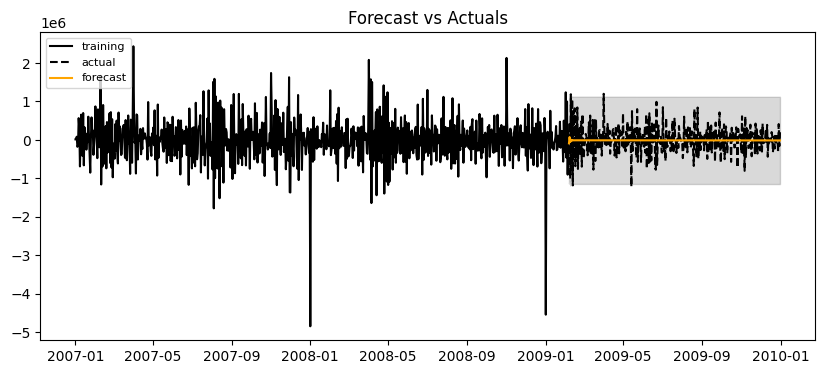

In [36]:
plot_forecast(forecast, X_train[["SalesAmount_diff"]], X_test[["SalesAmount_diff"]], confidence_int[:,0], confidence_int[:,1])

# SARIMA (seasonal ARIMA, no diff)

In [62]:
train_size = 0.7
split_index = round(train_size*data_seasonal.shape[0])

X_train = np.log(data_seasonal[["SalesAmount"]].iloc[:split_index])
X_test = np.log(data_seasonal[["SalesAmount"]].iloc[split_index:])

In [63]:
X_train

,SalesAmount
DateKey,
2007-01-01,15.933030
2007-01-02,15.934911
2007-01-03,15.944922
2007-01-04,15.923525
2007-01-05,15.906099
...,...
2009-02-01,16.086051
2009-02-02,16.037439
2009-02-03,16.140239


In [67]:
smodel = pm.auto_arima(X_train, seasonal=True, m=1, 
                       start_p=0, max_p=3, max_d=3, start_q=0, max_q=3,
                       start_P=0, max_P=3, max_D=3, start_Q=0, max_Q=3, 
                       trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2406.079, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2512.242, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2516.940, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2408.070, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2515.925, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-2515.623, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2519.064, Time=0.37 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2518.015, Time=0.82 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-2518.026, Time=1.06 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-2516.636, Time=0.48 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2515.861, Time=0.63 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-2515.910, Time=1.65 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-2521.038, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-2517.596, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0

In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [71]:
# Build Model
model_sarima = SARIMAX(X_train, order=(1, 1, 2), seasonal_order=(0, 0, 0, 0))
model_sarima = model_sarima.fit(maxiter=75)

# Forecast
results = model_sarima.get_forecast(len(X_test))
forecast = results.predicted_mean
confidence_int = results.conf_int()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.64848D+00    |proj g|=  1.20503D-01

At iterate    5    f= -1.64850D+00    |proj g|=  1.15141D-01

At iterate   10    f= -1.64864D+00    |proj g|=  2.68863D-03

At iterate   15    f= -1.64865D+00    |proj g|=  5.21120D-02

At iterate   20    f= -1.64866D+00    |proj g|=  5.54036D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     25      1     0     0   5.540D-04  -1.649D+00
  F =  -1.6486556606622644     

CONVERG

/home/kai/.pyenv/versions/3.10.6/envs/sales-ninja/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/kai/.pyenv/versions/3.10.6/envs/sales-ninja/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


In [73]:
# Reconstruct by taking exponential
forecast_recons = pd.Series(np.exp(forecast), index=X_test[["SalesAmount"]].index)
lower_recons = np.exp(confidence_int['lower SalesAmount']).values
upper_recons = np.exp(confidence_int['upper SalesAmount']).values

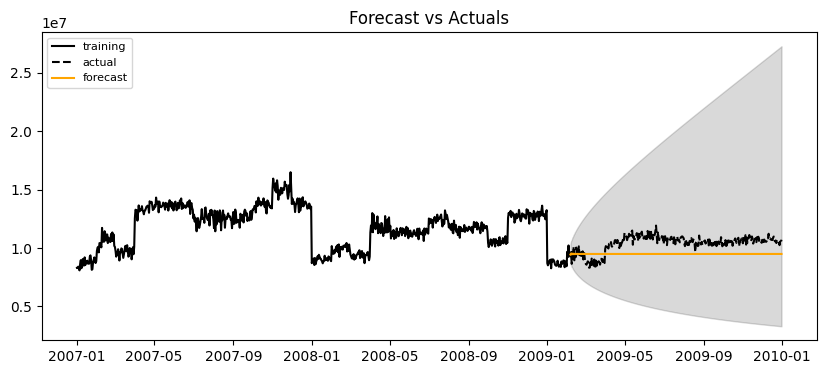

In [74]:
plot_forecast(forecast_recons, np.exp(X_train[["SalesAmount"]]), np.exp(X_test[["SalesAmount"]]), upper = upper_recons, lower=lower_recons)